In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score


file_path = '/content/openpowerlifting.csv'
df = pd.read_csv(file_path)

df = df.dropna()

num_cols = df.select_dtypes(include=['number']).columns

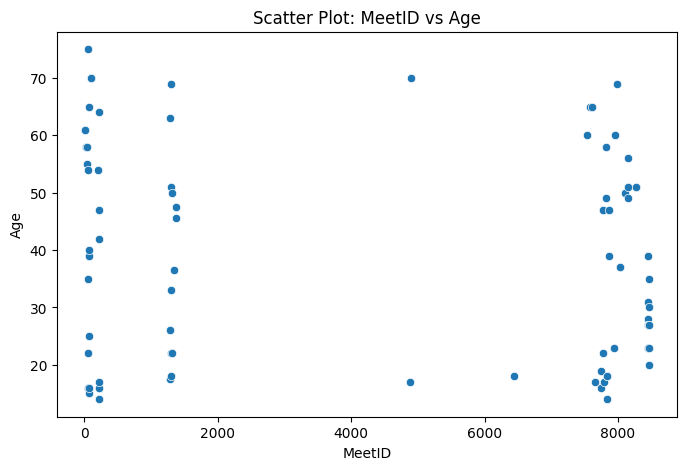

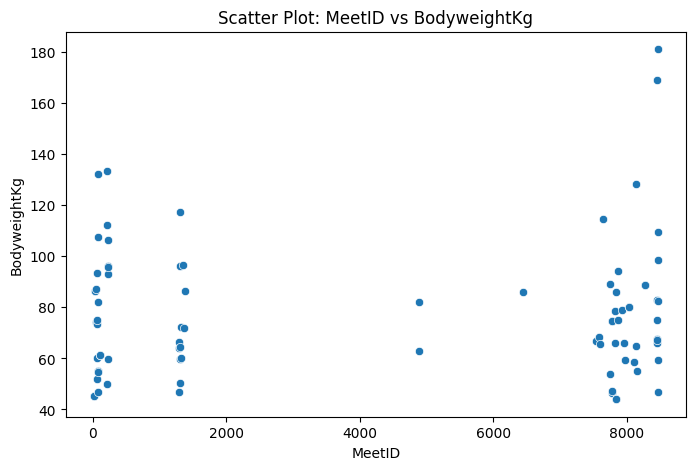

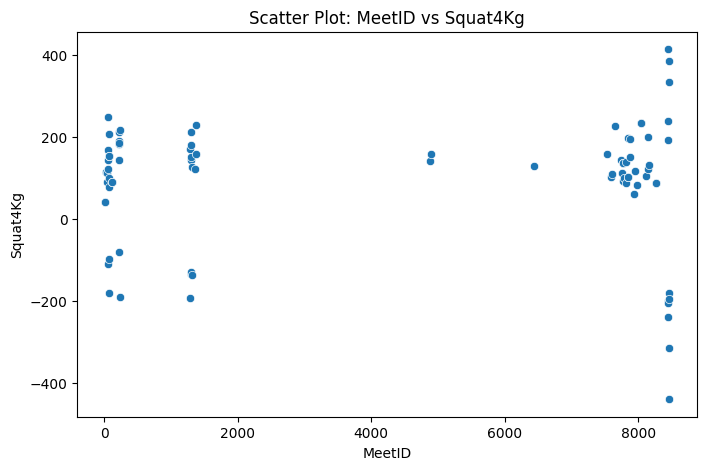

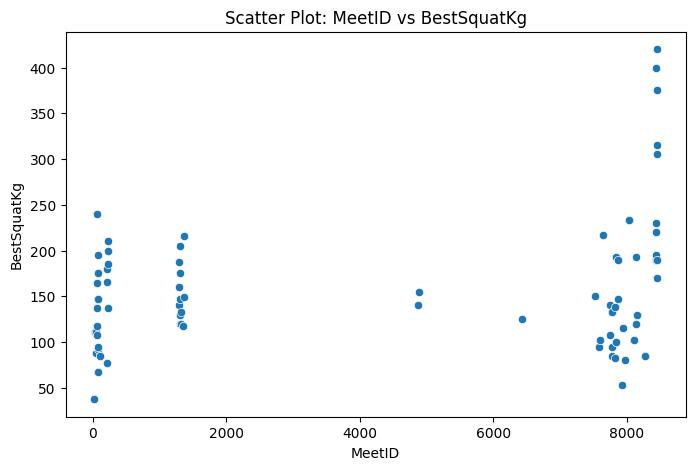

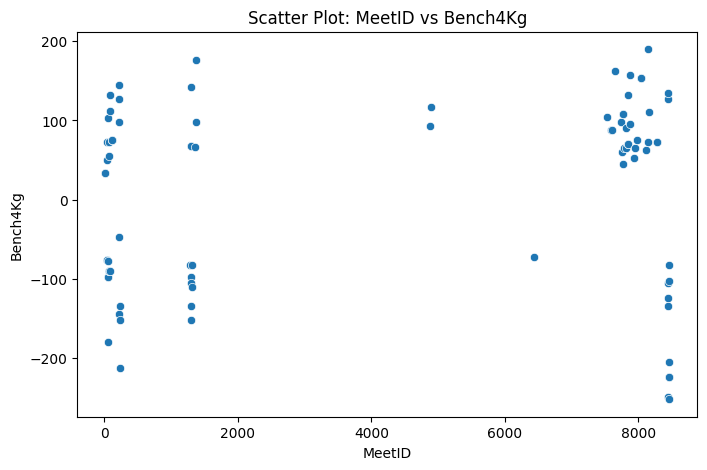

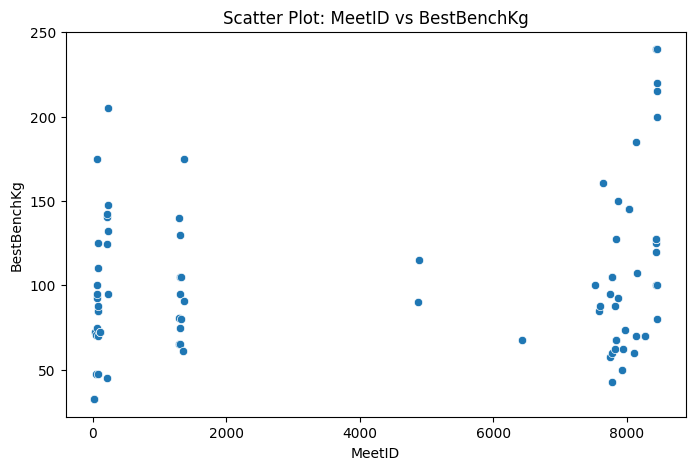

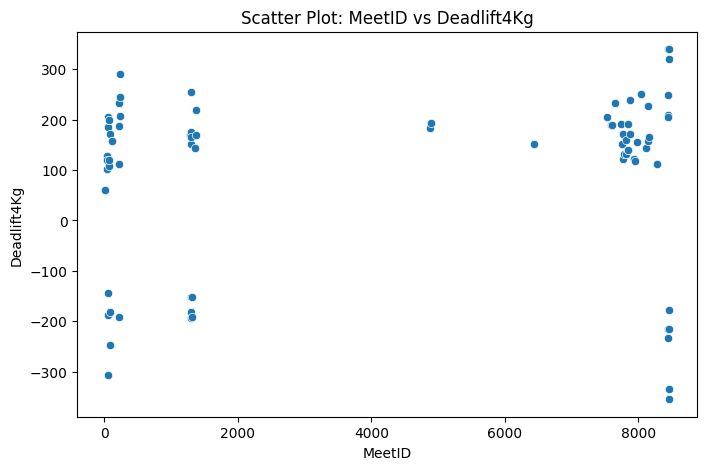

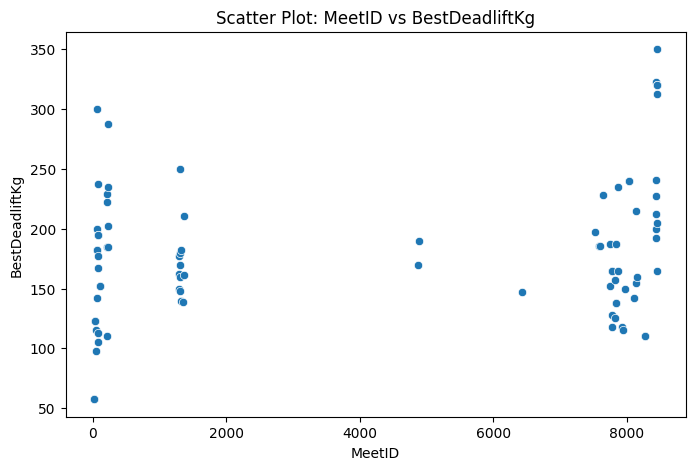

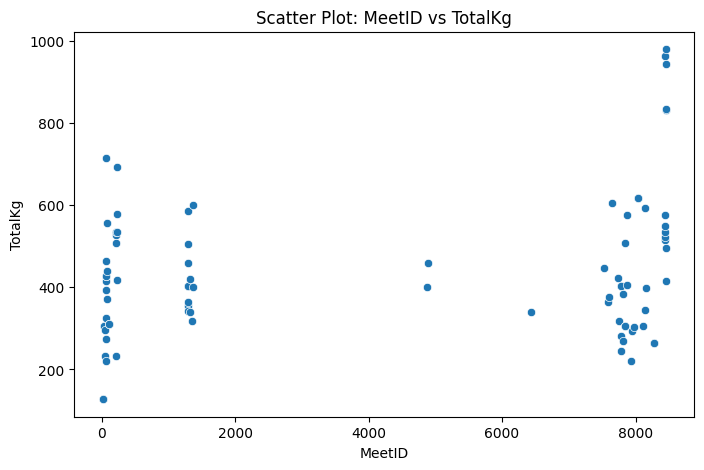

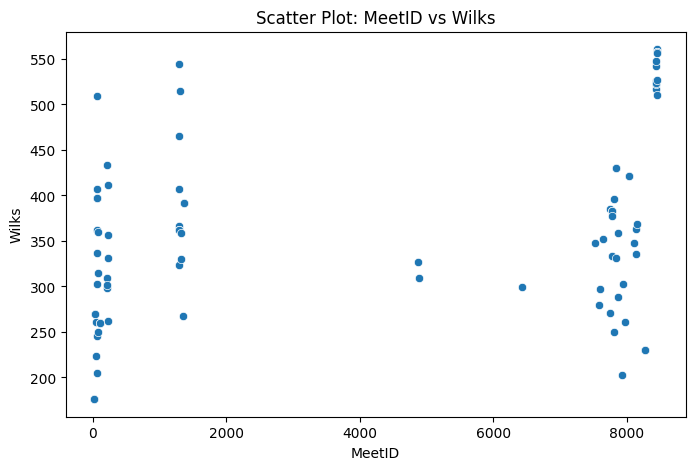

In [ ]:
for col in num_cols[1:]:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=df[num_cols[0]], y=df[col])
    plt.title(f"Scatter Plot: {num_cols[0]} vs {col}")
    plt.show()

In [2]:
from scipy.stats import skew, kurtosis
import pandas as pd

# Load the dataset
file_path = '/content/openpowerlifting.csv'
df = pd.read_csv(file_path)

# Drop missing values
df = df.dropna()

# Select numerical columns
num_cols = df.select_dtypes(include=['number']).columns

# Compute skewness and kurtosis
skewness = df[num_cols].apply(skew)
kurtosis_values = df[num_cols].apply(kurtosis)

print("Skewness:\n", skewness)
print("Kurtosis:\n", kurtosis_values)


Skewness:
 MeetID            2.678960
Age              -0.003109
BodyweightKg      0.681261
Squat4Kg         -1.065476
BestSquatKg      -0.113295
Bench4Kg         -0.068466
BestBenchKg       0.749587
Deadlift4Kg      -0.937360
BestDeadliftKg    0.166144
TotalKg           0.162422
Wilks             0.391108
dtype: float64
Kurtosis:
 MeetID            7.713325
Age              -1.410231
BodyweightKg     -0.286675
Squat4Kg         -0.178442
BestSquatKg      -0.400167
Bench4Kg         -1.426437
BestBenchKg       0.374656
Deadlift4Kg      -0.650964
BestDeadliftKg    0.394673
TotalKg          -0.000333
Wilks            -0.013081
dtype: float64


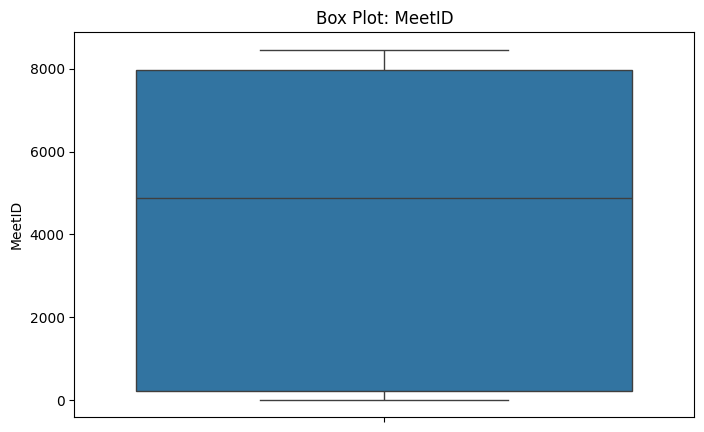

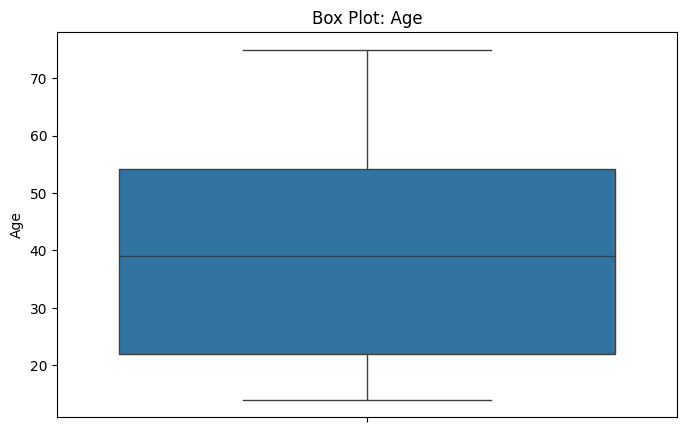

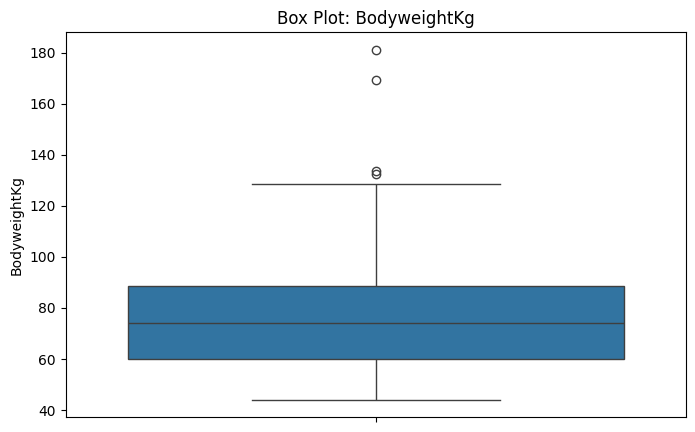

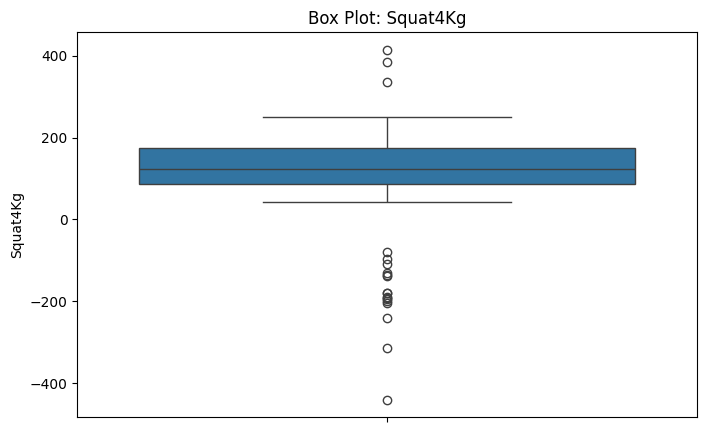

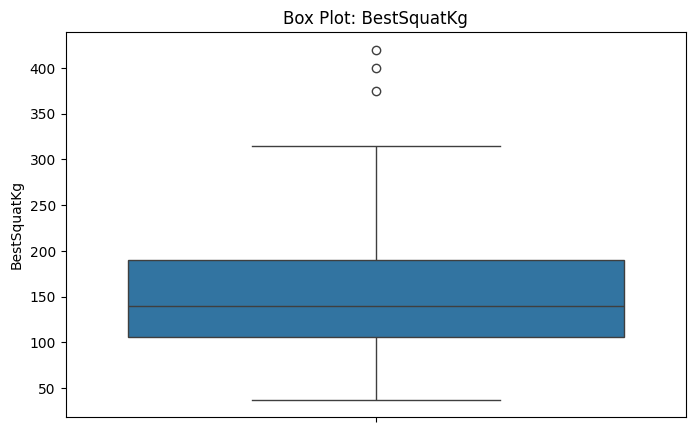

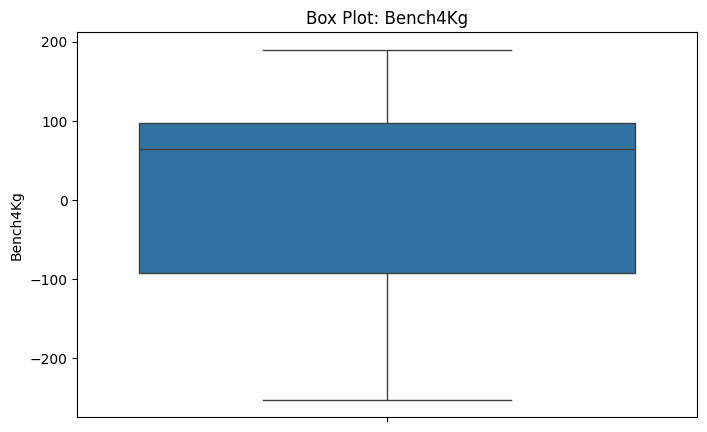

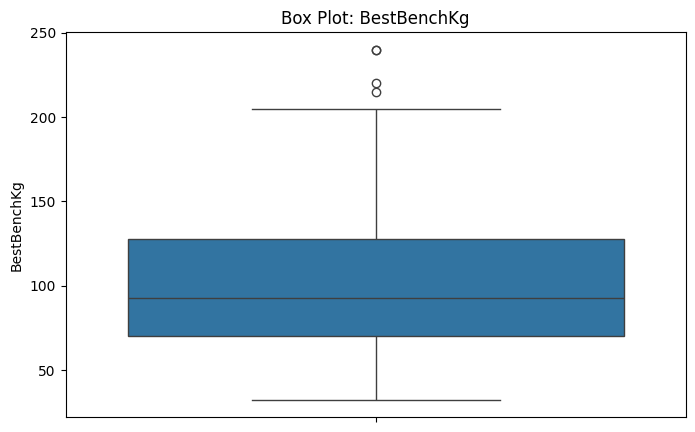

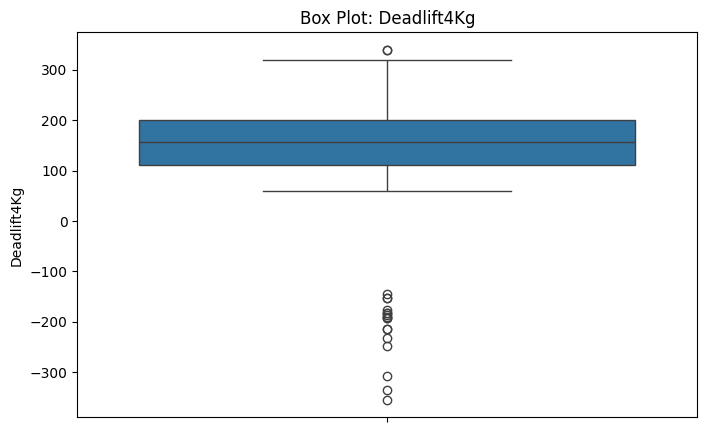

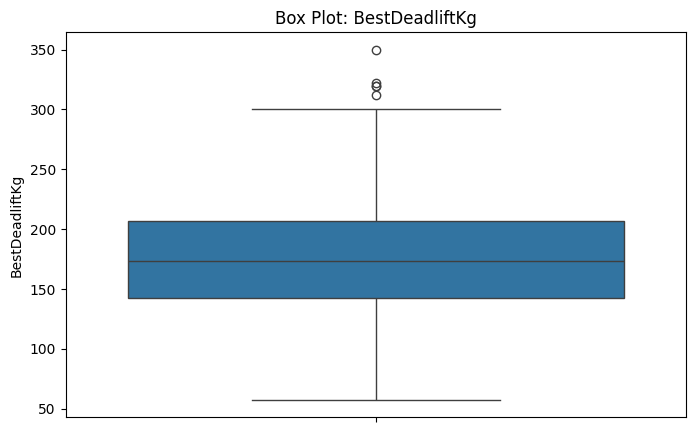

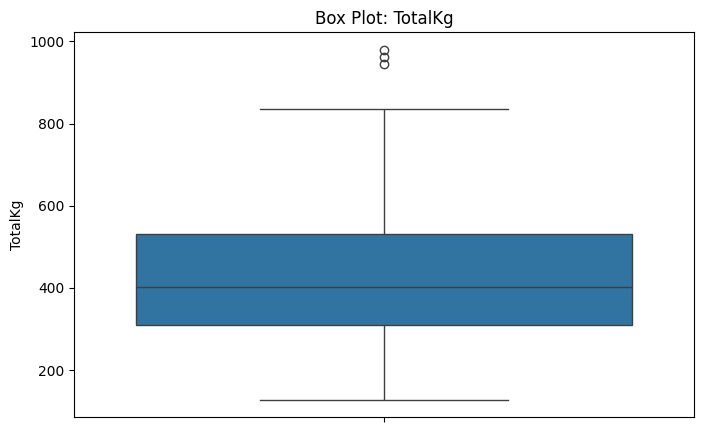

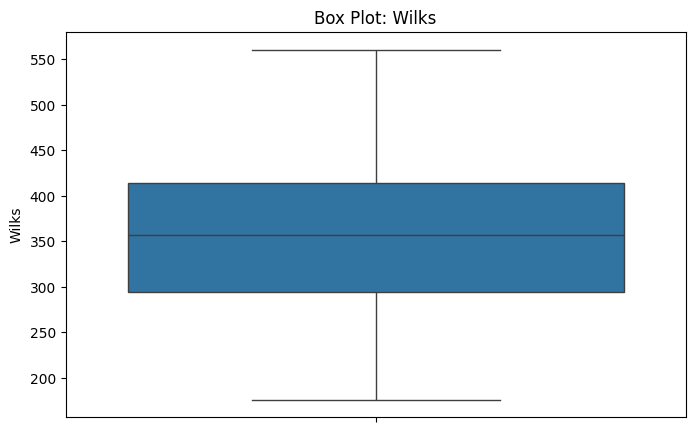

In [ ]:
for col in num_cols:
    plt.figure(figsize=(8, 5))
    sns.boxplot(y=df[col])
    plt.title(f"Box Plot: {col}")
    plt.show()

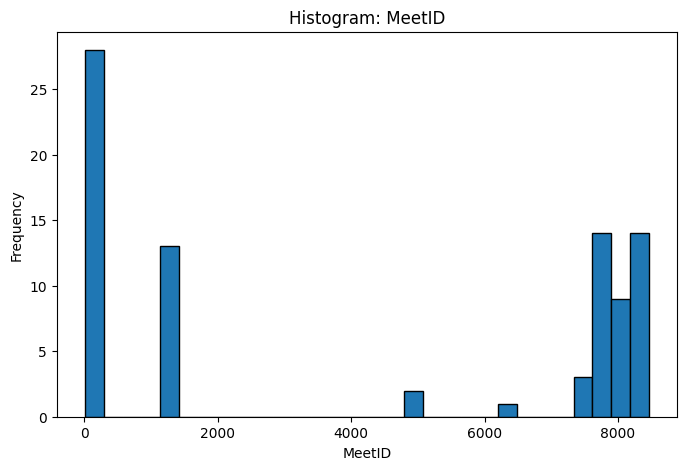

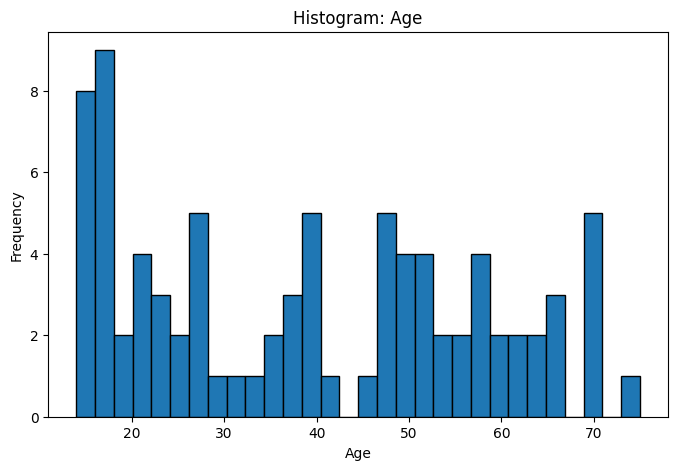

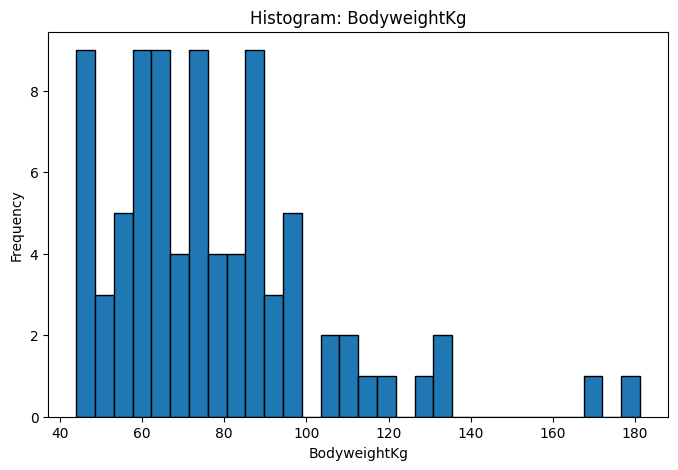

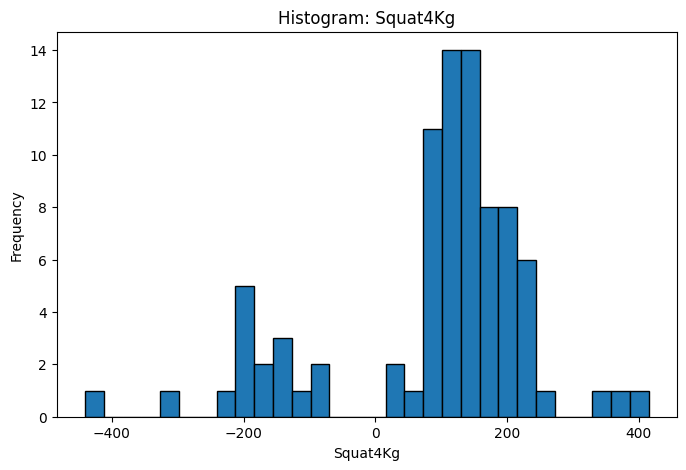

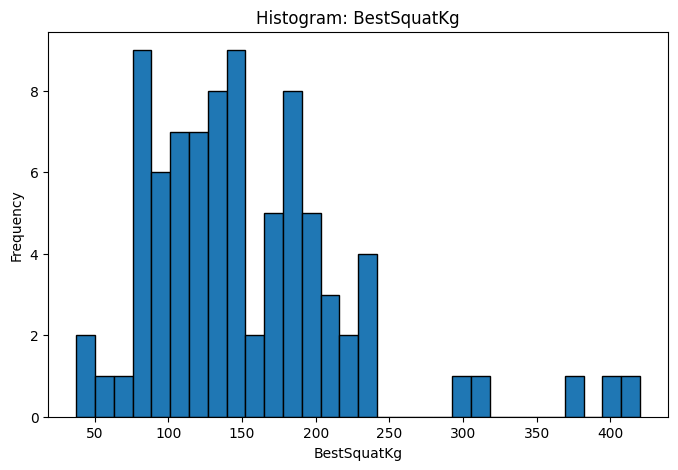

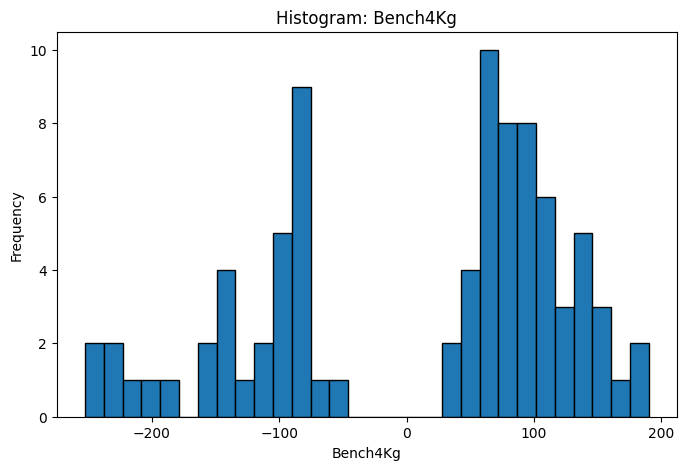

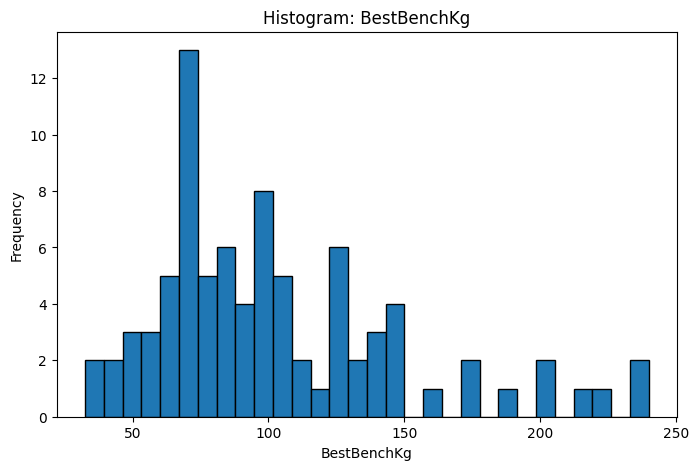

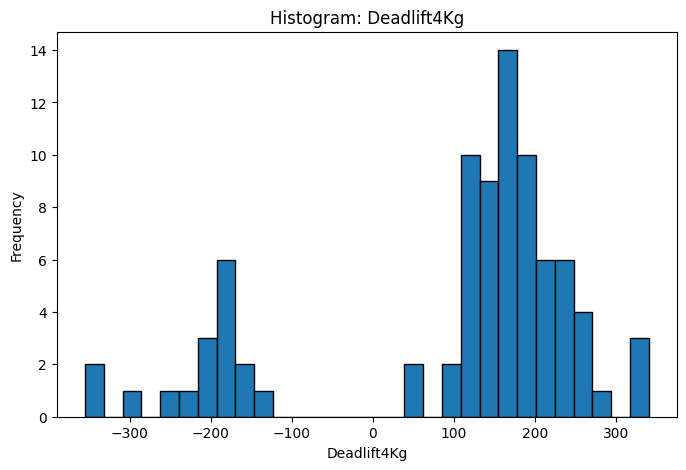

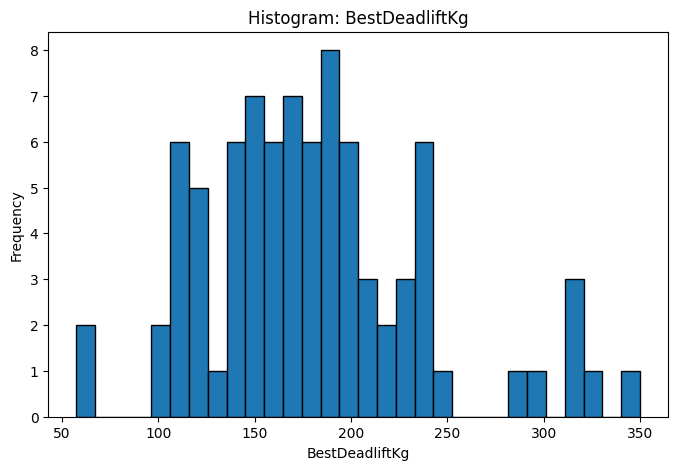

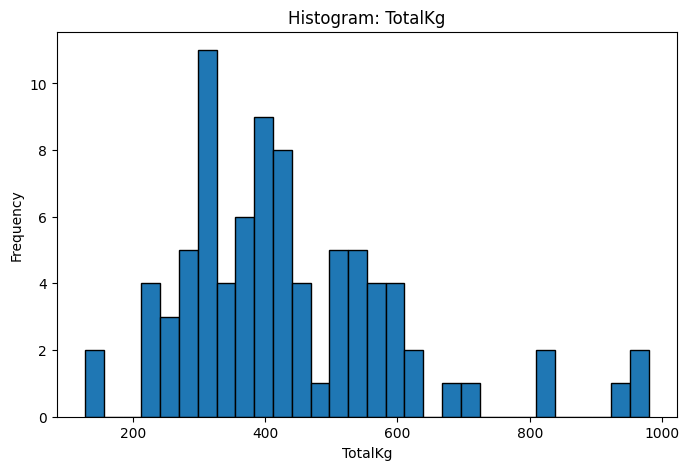

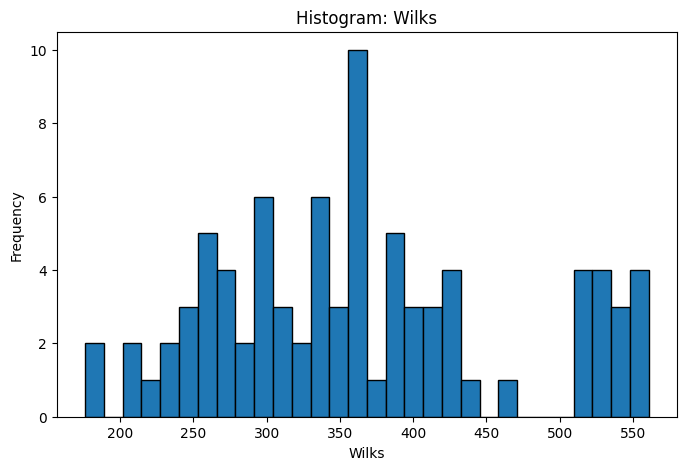

In [ ]:
for col in num_cols:
    plt.figure(figsize=(8, 5))
    plt.hist(df[col], bins=30, edgecolor='black')
    plt.title(f"Histogram: {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

In [ ]:
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1
filtered_df = df[~((df[num_cols] < (Q1 - 1.5 * IQR)) | (df[num_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]


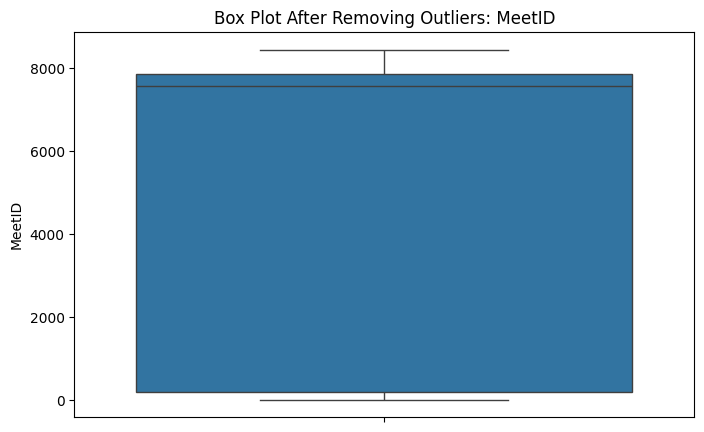

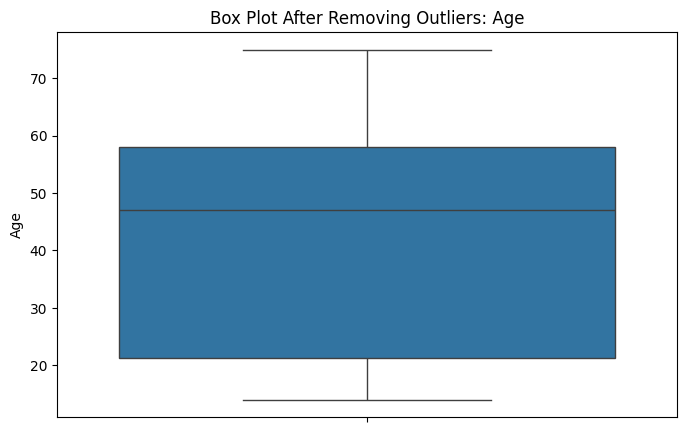

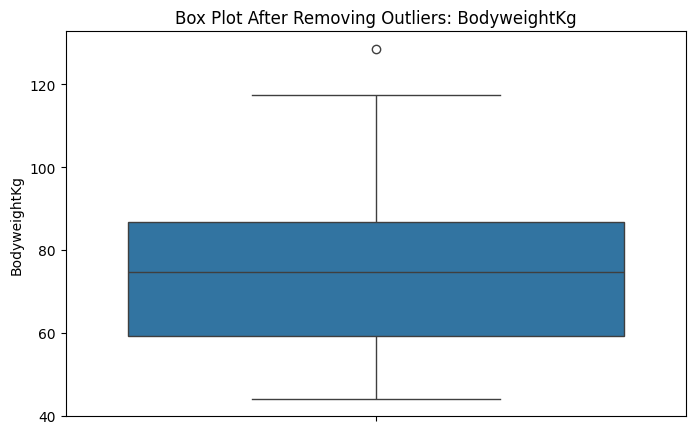

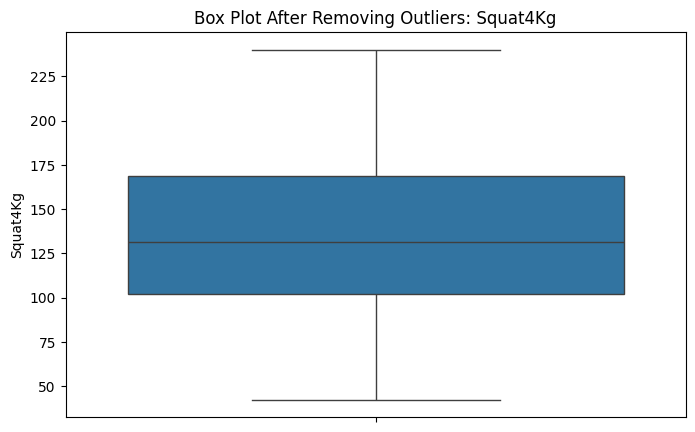

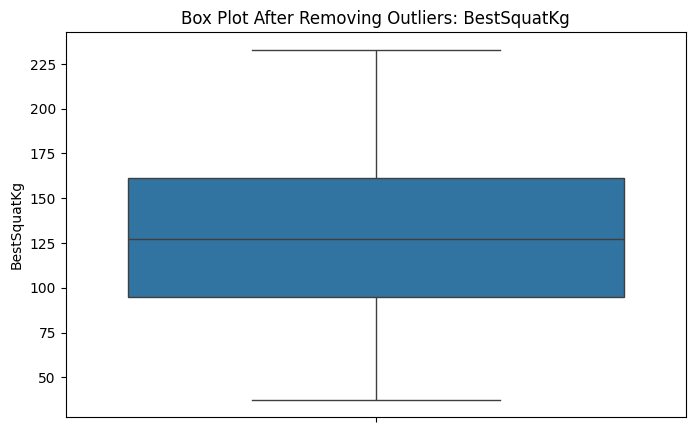

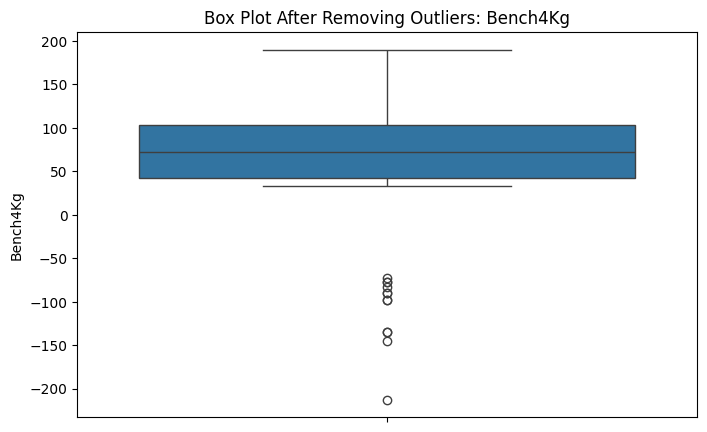

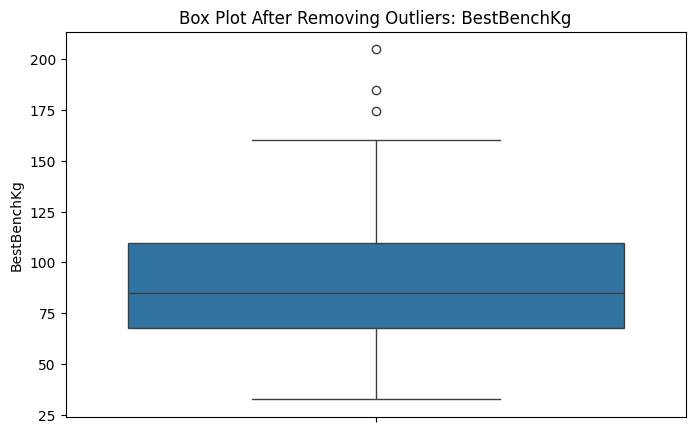

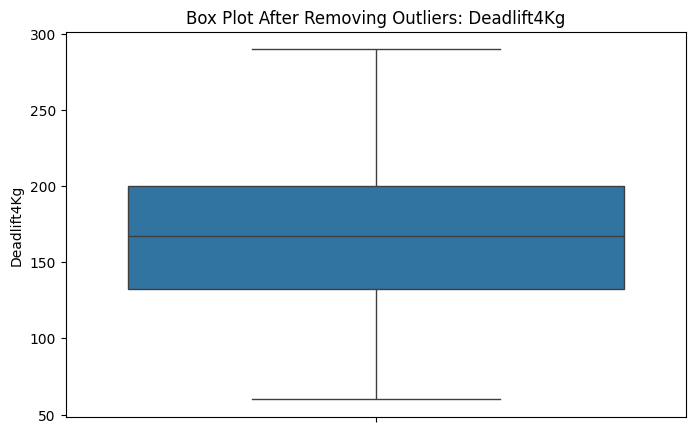

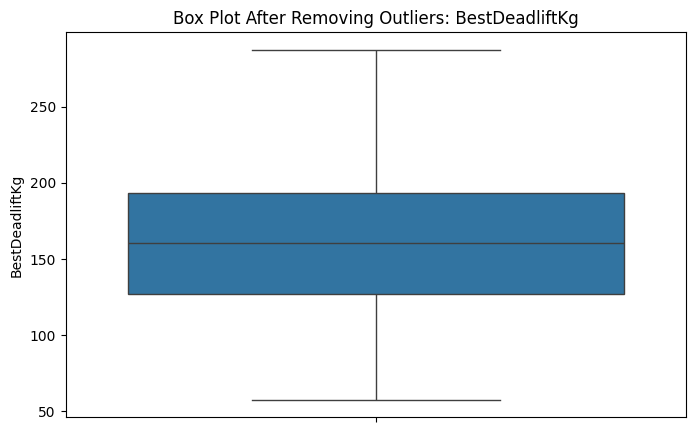

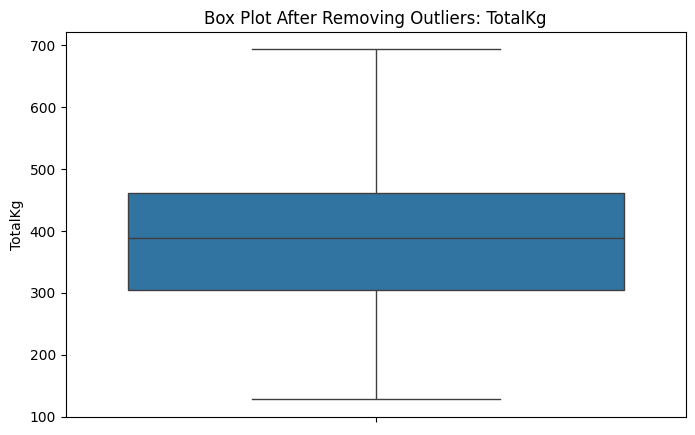

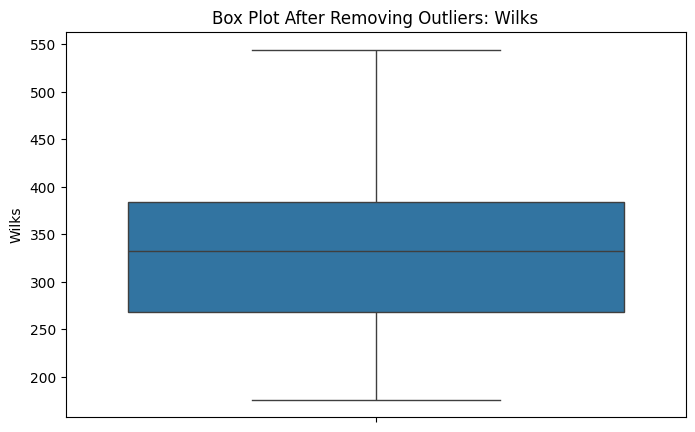

In [ ]:
for col in num_cols:
    plt.figure(figsize=(8, 5))
    sns.boxplot(y=filtered_df[col])
    plt.title(f"Box Plot After Removing Outliers: {col}")
    plt.show()


In [ ]:
def train_and_evaluate(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    models = {
        "Linear Regression": LinearRegression(),
        "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
        "Support Vector Machine": SVR()
    }
    results = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        results[name] = {"MSE": mse, "R2 Score": r2}
    return results

In [ ]:
X = df[[num_cols[0]]]
y = df[num_cols[1]]
results_before = train_and_evaluate(X, y)
print("Results Before Removing Outliers:", results_before)


Results Before Removing Outliers: {'Linear Regression': {'MSE': 247.3667055711543, 'R2 Score': 0.04316489667179402}, 'Random Forest': {'MSE': 346.6610525250748, 'R2 Score': -0.3409139408912196}, 'Support Vector Machine': {'MSE': 253.1853726630032, 'R2 Score': 0.02065780577123555}}


In [ ]:
X_filtered = filtered_df[[num_cols[0]]]
y_filtered = filtered_df[num_cols[1]]
results_after = train_and_evaluate(X_filtered, y_filtered)
print("Results After Removing Outliers:", results_after)


Results After Removing Outliers: {'Linear Regression': {'MSE': 527.583718392373, 'R2 Score': -0.26310631367319615}, 'Random Forest': {'MSE': 929.3033873028156, 'R2 Score': -1.2248771804346923}, 'Support Vector Machine': {'MSE': 514.7464728136023, 'R2 Score': -0.23237222280676884}}
